In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from PIL import Image, ImageSequence

In [3]:
from matplotlib import pyplot as plt

In [4]:
from cancer.visulize import show_image
from cancer.datasets import get_sipakmed, get_smear
from cancer.utils.utils import read_bmp

/Users/seanwade/.pyenv/versions/3.7.2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/seanwade/.pyenv/versions/3.7.2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/seanwade/.pyenv/versions/3.7.2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/seanwade/.pyenv/versions/3.7.2

In [5]:
image = '/Users/seanwade/projects/cancerDetection/data/UNET/train-volume.tif'
label = '/Users/seanwade/projects/cancerDetection/data/UNET/train-labels.tif'

In [6]:
img = np.array([np.array(p) for p in ImageSequence.Iterator(Image.open(image))])
lab = np.array([np.array(p) for p in ImageSequence.Iterator(Image.open(label))])

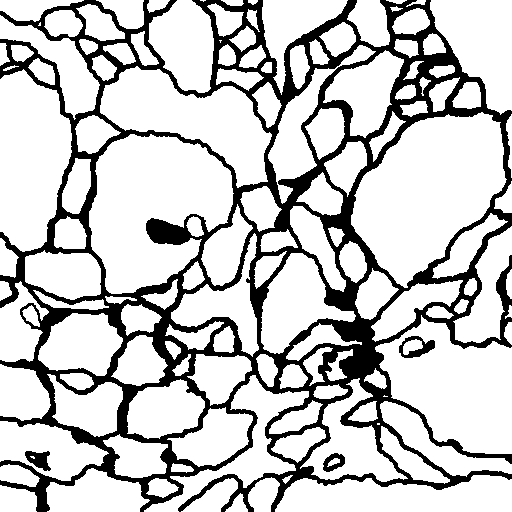

In [7]:
show_image(lab[0,:,:])

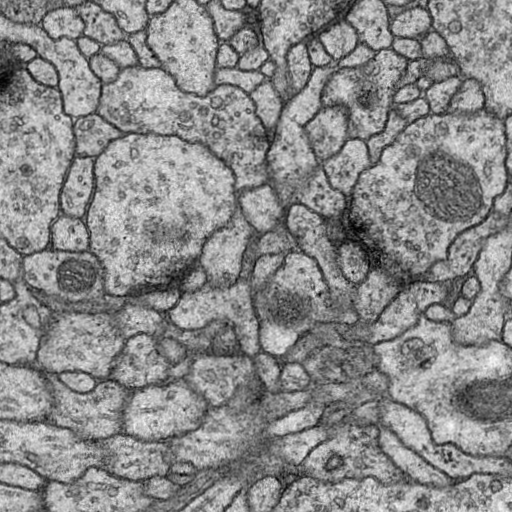

In [8]:
show_image(img[0,:,:])

In [10]:
img.shape

(30, 512, 512)

In [57]:
data = get_smear(flat=True)

917


In [93]:
from cancer.utils.utils import get_min_and_max_images, pad_and_center

In [75]:
max_dim, min_dim = get_min_and_max_images(data[0])

In [81]:
data.shape[0]

3

## REsize all images

In [151]:
imgs, masks, labels = get_smear(flat=True)

ValueError: all input arrays must have the same shape

In [150]:
imgs[0].shape

(71, 100, 3)

In [131]:
new_data = []
for img, mask, lab in data.T:
    new_img = pad_and_center(img, (max_dim, max_dim, 3))
    print
    new_mask = pad_and_center(mask, (max_dim, max_dim, 3))
    new_data.append([new_img, new_mask, lab])
    
new_data = np.array(new_data).T

In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [133]:
from tensorflow.keras.datasets import 

In [134]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 59s 0us/step


In [138]:
y_train.shape

(50000, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


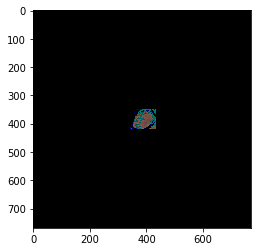

In [116]:
plt.imshow(img)

In [113]:
show_image(img)

TypeError: Cannot handle this data type

In [31]:
smear = get_smear()

In [13]:
label = '/Users/seanwade/projects/cancerDetection/data/SMEAR2005/pictures/moderate_dysplastic/148848523-148848538-001-d.bmp'
image = '/Users/seanwade/projects/cancerDetection/data/SMEAR2005/pictures/moderate_dysplastic/148848523-148848538-001.BMP'

In [30]:
img = read_bmp(image)
lab = read_bmp(label)

In [31]:
from 

In [20]:
smear['severe_dysplastic'].keys()

dict_keys(['imgs', 'masks'])

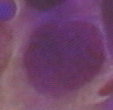

In [33]:
show_image(img)

In [ ]:
show_image(lab)

In [159]:
from cancer.datasets import get_sipakmed
from cancer.variables import ABNORMAL_CELL_TYPES_SIP, NORMAL_CELL_TYPES_SIP
from cancer.utils.utils import read_bmp

In [156]:
d = data['metaplastic']

In [208]:
BASE_DIR = '/Users/seanwade/Desktop/data'

In [206]:
import os
from os.path import join

In [211]:
NORMAL_CELL_TYPES_SIP

['superficial-intermediate', 'parabasal']

In [212]:
w, h = 512, 512

data = get_sipakmed()

for cell_type in NORMAL_CELL_TYPES_SIP:
    d = data[cell_type]
    for img_path, cyto_polys in zip(d['imgs'], d['cytos']):
        img = read_bmp(img_path)
        mask = np.zeros(img.shape[:2],dtype=np.uint8)
        for poly in cyto_polys:
            poly = np.expand_dims(poly, axis=0).astype(int)
            cv2.fillPoly(mask, poly, 255)


        img = cv2.resize(img,(w,h))
        mask = cv2.resize(mask,(w,h))
        
        img_name = cell_type + os.path.basename(img_path)
        img_name = img_name.replace('.bmp','.png')
        mask_name = img_name.replace('.','_mask.')
        
        cv2.imwrite(join(BASE_DIR, 'normal', 'images', img_name), img)
        cv2.imwrite(join(BASE_DIR, 'normal', 'masks', mask_name), mask)

In [213]:
for cell_type in ABNORMAL_CELL_TYPES_SIP:
    d = data[cell_type]
    for img_path, cyto_polys in zip(d['imgs'], d['cytos']):
        img = read_bmp(img_path)
        mask = np.zeros(img.shape[:2],dtype=np.uint8)
        for poly in cyto_polys:
            poly = np.expand_dims(poly, axis=0).astype(int)
            cv2.fillPoly(mask, poly, 255)


        img = cv2.resize(img,(w,h))
        mask = cv2.resize(mask,(w,h))
        
        img_name = cell_type + os.path.basename(img_path)
        img_name = img_name.replace('.bmp','.png')
        mask_name = img_name.replace('.','_mask.')
        
        cv2.imwrite(join(BASE_DIR, 'abnormal', 'images', img_name), img)
        cv2.imwrite(join(BASE_DIR, 'abnormal', 'masks', mask_name), mask)

In [202]:
cv2.imwrite(img_name, img)

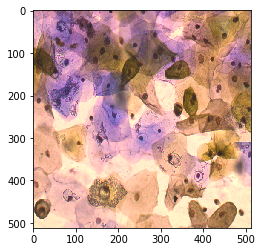

In [201]:
plt.imshow(img)

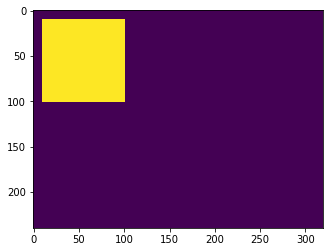

In [185]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

a3 = np.array( [[[10,10],[100,10],[100,100],[10,100]]], dtype=np.int32 )
im = np.zeros([240,320],dtype=np.uint8)

cv2.fillPoly( im, a3, 255 )

plt.imshow(im)
plt.show()

In [189]:
a3.shape

(1, 4, 2)

In [190]:
poly.shape

(1, 34, 2)

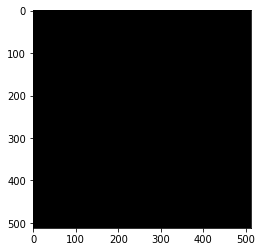

In [168]:
plt.imshow(mask)